# Componentes y suavizamiento de una serie temporal

In [1]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv("../data/raw/data.csv",
                 parse_dates=['fecha'],
                 index_col='fecha')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 332 entries, 1994-01-31 to 2021-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   plomo   332 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


In [18]:
df

,plomo
fecha,
1994-01-31,12.15
1994-02-28,9.87
1994-03-31,11.47
1994-04-30,14.79
1994-05-31,25.11
...,...
2021-04-30,168.42
2021-05-31,252.62
2021-06-30,125.72


## Componentes de una serie temporal

### Evaluación gráfica

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Evolución de las exportaciones:

Text(0, 0.5, 'Valor')

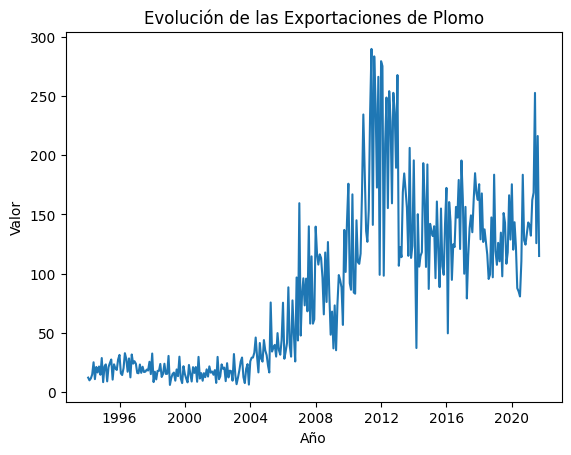

In [19]:
# Crear el primer gráfico
plt.plot(df["plomo"])

# Configurar el título y etiquetas del eje
plt.title('Evolución de las Exportaciones de Plomo')
plt.xlabel('Año')
plt.ylabel('Valor')

Gráfico para evaluar estacionalidad de la serie temporal:

Text(0, 0.5, 'Exportaciones')

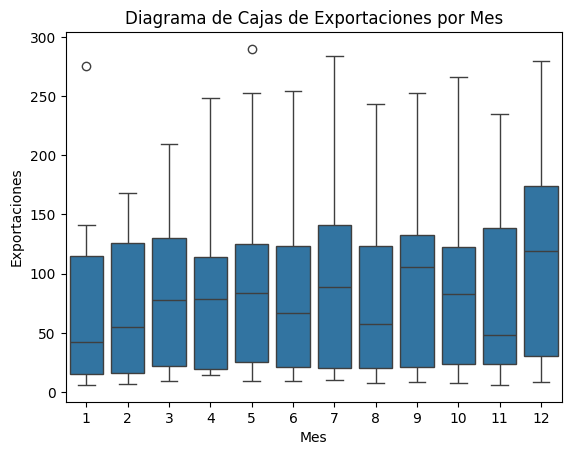

In [20]:
# Crear un diagrama de cajas para cada mes
sns.boxplot(x=df.index.month, y=df['plomo'])

# Configurar el título y etiquetas del eje
plt.title('Diagrama de Cajas de Exportaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Exportaciones')

### Descomposición de la serie temporal

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### Descomposición multiplicativa

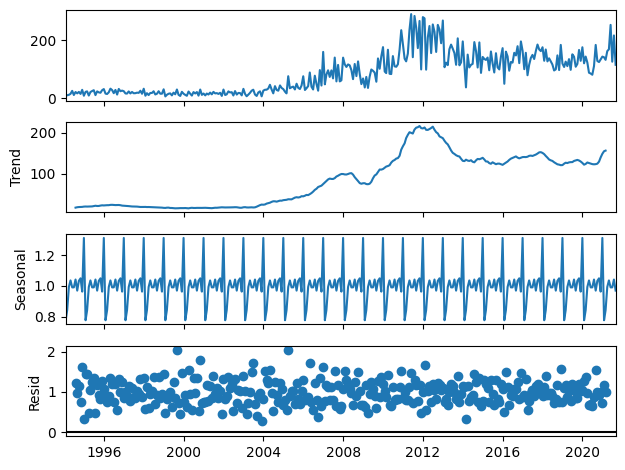

In [22]:
df_decomposed = seasonal_decompose(
    df,
    model='mul'
)

df_decomposed.plot()
plt.show()

Descomposición mostrada de manera aislada:

<Axes: xlabel='fecha'>

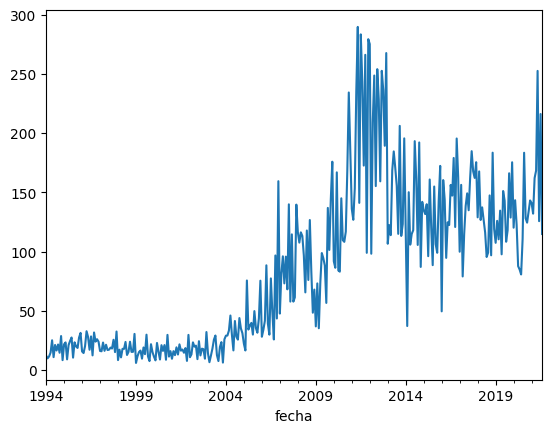

In [23]:
observada = df_decomposed.observed
observada.plot()

<Axes: xlabel='fecha'>

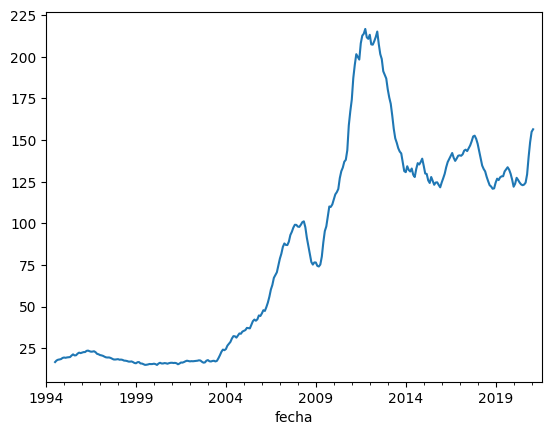

In [24]:
tendencia = df_decomposed.trend
tendencia.plot()

<Axes: xlabel='fecha'>

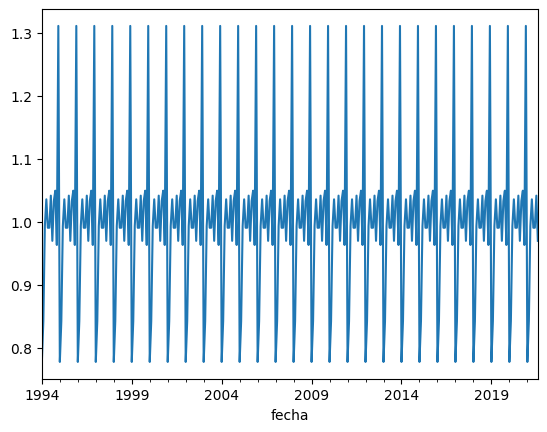

In [25]:
estacionalidad = df_decomposed.seasonal
estacionalidad.plot()

<Axes: xlabel='fecha'>

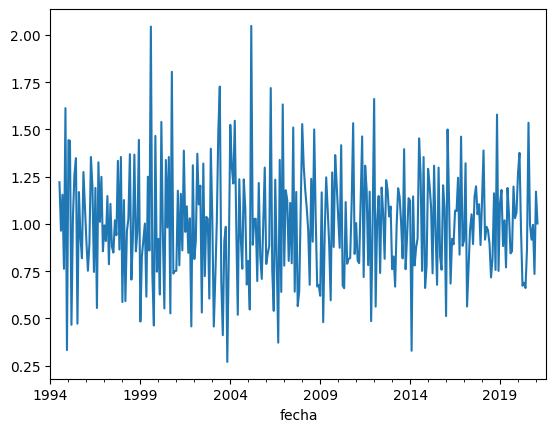

In [26]:
residuos = df_decomposed.resid
residuos.plot()

Resumen de todas las componentes multiplicativas de la serie temporal:

In [27]:
componentes = pd.concat([observada, tendencia, estacionalidad, residuos], axis=1)
componentes

,0,trend,seasonal,resid
fecha,,,,
1994-01-31,12.15,NaN,0.777565,NaN
1994-02-28,9.87,NaN,0.842506,NaN
1994-03-31,11.47,NaN,0.993316,NaN
1994-04-30,14.79,NaN,1.035881,NaN
1994-05-31,25.11,NaN,0.990690,NaN
...,...,...,...,...
2021-04-30,168.42,NaN,1.035881,NaN
2021-05-31,252.62,NaN,0.990690,NaN
2021-06-30,125.72,NaN,0.990792,NaN


#### Descomposición aditiva

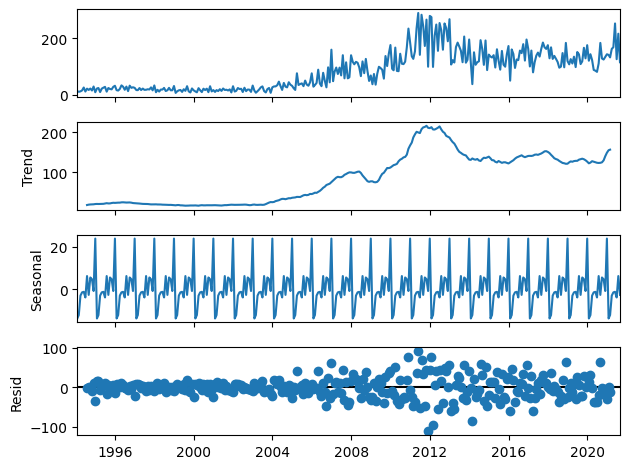

In [28]:
df_decomposed = seasonal_decompose(
    df,
    model='add'
)

df_decomposed.plot()
plt.show()

Descomposición mostrada de manera aislada:

<Axes: xlabel='fecha'>

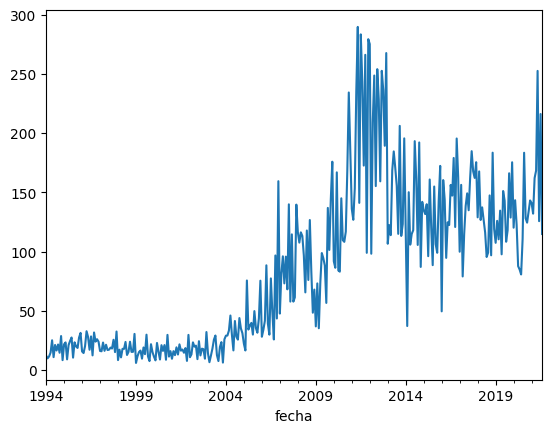

In [29]:
observada = df_decomposed.observed
observada.plot()

<Axes: xlabel='fecha'>

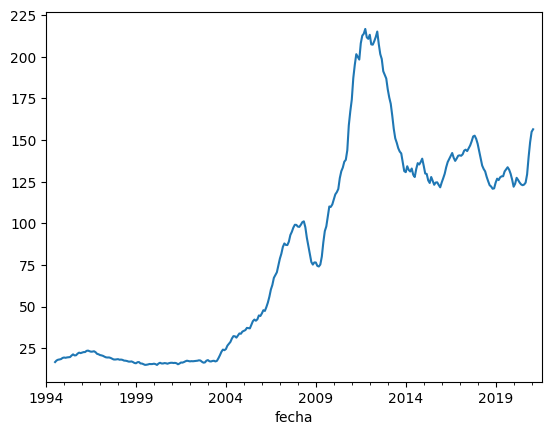

In [30]:
tendencia = df_decomposed.trend
tendencia.plot()

<Axes: xlabel='fecha'>

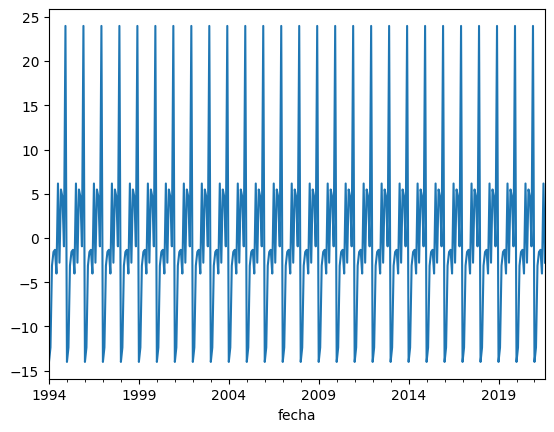

In [31]:
estacionalidad = df_decomposed.seasonal
estacionalidad.plot()

<Axes: xlabel='fecha'>

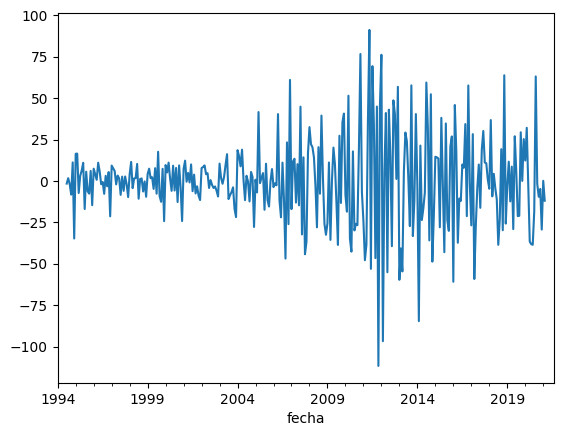

In [32]:
residuos = df_decomposed.resid
residuos.plot()

Resumen de todas las componentes aditivias de la serie temporal:

In [33]:
componentes = pd.concat([observada, tendencia, estacionalidad, residuos], axis=1)
componentes

,0,trend,seasonal,resid
fecha,,,,
1994-01-31,12.15,NaN,-14.018267,NaN
1994-02-28,9.87,NaN,-12.385181,NaN
1994-03-31,11.47,NaN,-3.139425,NaN
1994-04-30,14.79,NaN,-1.584409,NaN
1994-05-31,25.11,NaN,-1.342213,NaN
...,...,...,...,...
2021-04-30,168.42,NaN,-1.584409,NaN
2021-05-31,252.62,NaN,-1.342213,NaN
2021-06-30,125.72,NaN,-4.023928,NaN


## Estabilización de la variabilidad de la serie temporal

### Aplicando logaritmo

In [34]:
df['log_plomo'] = np.log(df['plomo'])

<Axes: xlabel='fecha'>

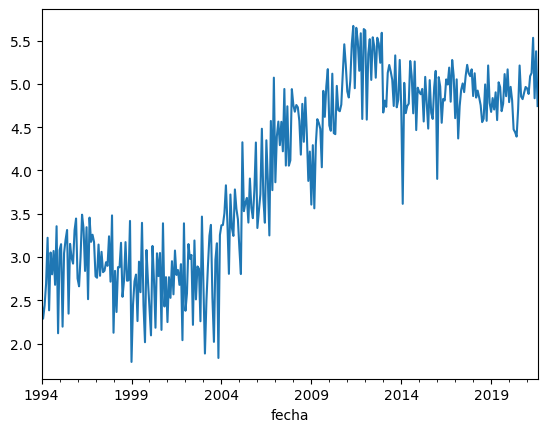

In [35]:
df['log_plomo'].plot()

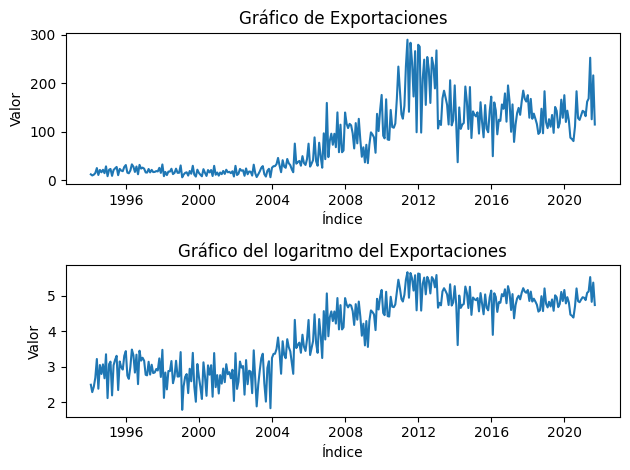

In [36]:
# Configurar la disposición de los subgráficos
plt.subplot(2, 1, 1)

# Crear el primer gráfico
plt.plot(df["plomo"])

# Configurar el título y etiquetas del eje
plt.title('Gráfico de Exportaciones')
plt.xlabel('Índice')
plt.ylabel('Valor')

# Cambiar a la siguiente celda de la cuadrícula
plt.subplot(2, 1, 2)

# Crear el segundo gráfico
plt.plot(df["log_plomo"])

# Configurar el título y etiquetas del eje
plt.title('Gráfico del logaritmo del Exportaciones')
plt.xlabel('Índice')
plt.ylabel('Valor')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Aplicando primera diferencia a la serie temporal

<Axes: xlabel='fecha'>

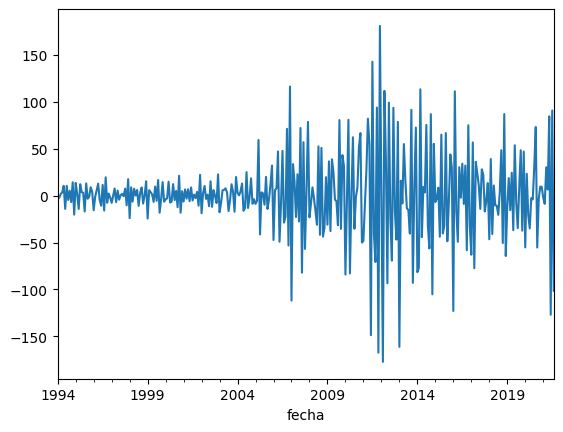

In [37]:
# Calcular la primera diferencia de la columna 'Desembolo'
df['Exportaciones_1raDiferencia'] = df['plomo'].diff()

# Mostrar la primera diferencia
df['Exportaciones_1raDiferencia'].plot()

## Eliminando estacionalidad a la serie temporal

<Axes: xlabel='fecha'>

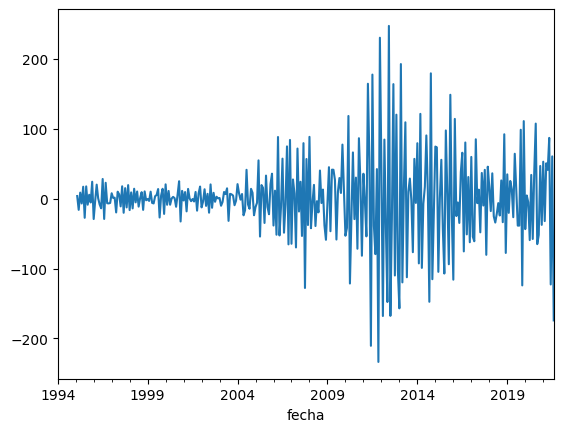

In [38]:
# Calcular la diferencia entre cada valor y el valor que está 12 pasos atrás
df['tsstationary'] = df['Exportaciones_1raDiferencia'].diff(periods=12)
df['tsstationary'].plot()

## Suavizamiento de una serie temporal

Se recomienda leer la referencia "metodosSuavizado.pdf" de esta práctica dirigida.

In [41]:
df[['plomo']]

,plomo
fecha,
1994-01-31,12.15
1994-02-28,9.87
1994-03-31,11.47
1994-04-30,14.79
1994-05-31,25.11
...,...
2021-04-30,168.42
2021-05-31,252.62
2021-06-30,125.72


### Método de media móvil

#### Con una ventana de periodos igual a 3

Media móvil simple:

In [40]:
def calcular_medias_moviles_y_graficar(dataframe, columna, ventanas):
    """
    Calcula las medias móviles simples de una columna en un dataframe para diferentes tamaños de ventana,
    imprime el RSME para cada ventana y grafica la serie original y las series con las medias móviles.
    
    Parámetros:
    - dataframe: El DataFrame de pandas que contiene los datos.
    - columna: El nombre de la columna (string) que contiene la serie temporal a analizar.
    - ventanas: Una lista de enteros que representan los tamaños de las ventanas para calcular las medias móviles.
    """
    # Asegurar copia para no modificar el original
    df = dataframe.copy()
    
    # Configurar el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(df[columna], label='Serie Original', color='blue', alpha=0.75)
    
    # Calcular la media móvil simple para cada tamaño de ventana y graficar
    for ventana in ventanas:
        df[f'SMA_{ventana}'] = df[columna].rolling(window=ventana).mean()
        
        # Calcular RSME
        rsme = np.sqrt(np.nanmean((df[columna] - df[f'SMA_{ventana}'])**2))
        print(f"El valor de RSME para ventana de {ventana} es: {rsme}")
        
        # Graficar la media móvil
        plt.plot(df[f'SMA_{ventana}'], label=f'SMA {ventana} períodos', linestyle='--')
    
    # Finalizar configuraciones del gráfico
    plt.title('Serie Original vs. Medias Móviles Simples')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.legend()
    plt.show()

El valor de RSME para ventana de 3 es: 24.721470620285306
El valor de RSME para ventana de 4 es: 24.94069710786857
El valor de RSME para ventana de 5 es: 27.286460546998885


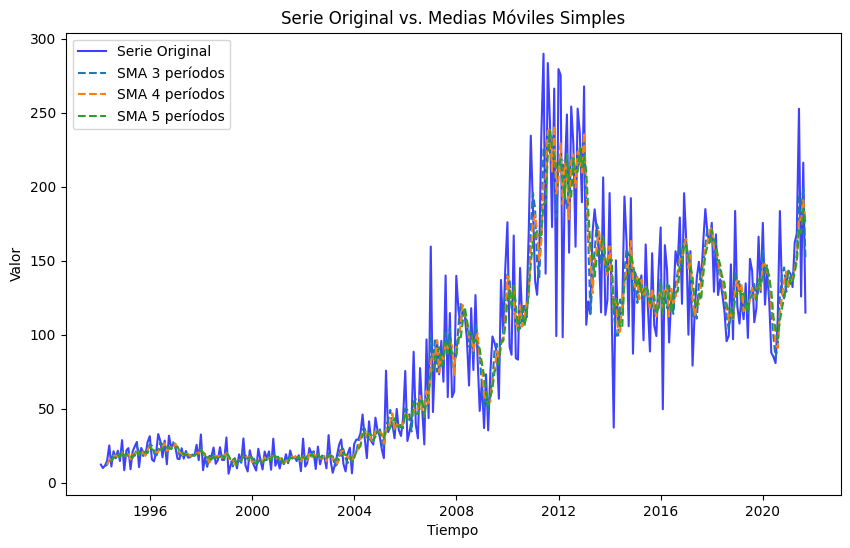

In [42]:
calcular_medias_moviles_y_graficar(df, 'plomo', [3, 4, 5])

El método de suavizamiento de medias móviles simples con una ventana de 3 periodos brinda la menor raíz del error cuadrático medio.

Media móvil centrada:

In [43]:
def calcular_medias_moviles_y_graficar(dataframe, columna, ventanas):
    """
    Calcula las medias móviles centradas de una columna en un dataframe para diferentes tamaños de ventana,
    imprime el RSME para cada ventana y grafica la serie original y las series con las medias móviles.
    
    Parámetros:
    - dataframe: El DataFrame de pandas que contiene los datos.
    - columna: El nombre de la columna (string) que contiene la serie temporal a analizar.
    - ventanas: Una lista de enteros que representan los tamaños de las ventanas para calcular las medias móviles.
    """
    # Asegurar copia para no modificar el original
    df = dataframe.copy()
    
    # Configurar el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(df[columna], label='Serie Original', color='blue', alpha=0.75)
    
    # Calcular la media móvil simple para cada tamaño de ventana y graficar
    for ventana in ventanas:
        df[f'SMA_{ventana}'] = df[columna].rolling(window=ventana, center=True).mean()
        
        # Calcular RSME
        rsme = np.sqrt(np.nanmean((df[columna] - df[f'SMA_{ventana}'])**2))
        print(f"El valor de RSME para ventana de {ventana} es: {rsme}")
        
        # Graficar la media móvil
        plt.plot(df[f'SMA_{ventana}'], label=f'SMA {ventana} períodos', linestyle='--')
    
    # Finalizar configuraciones del gráfico
    plt.title('Serie Original vs. Medias Móviles Simples')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.legend()
    plt.show()

El valor de RSME para ventana de 3 es: 26.280737175701834
El valor de RSME para ventana de 4 es: 27.412795453898248
El valor de RSME para ventana de 5 es: 27.6028986035357


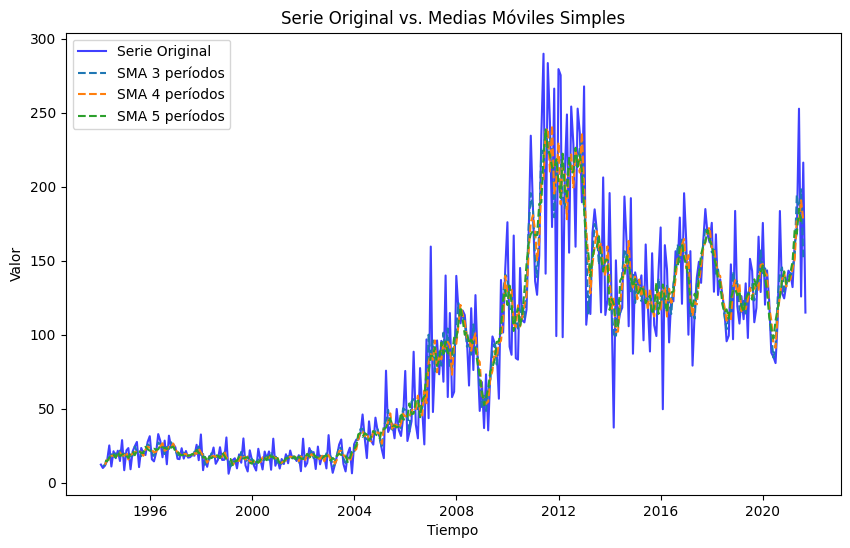

In [44]:
calcular_medias_moviles_y_graficar(df, 'plomo', [3, 4, 5])

El método de suavizamiento de medias móviles centradas con una ventana de 3 periodos brinda la menor raíz del error cuadrático medio.

### Método de suavizamiento exponencial

Se recomienda ver el siguiente video [Exponential Smoothing Forecast|Practical Time Series analysis (Machine Learning) in sktime (Python)](https://www.youtube.com/watch?v=F0mpcRISFOU).

In [48]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [45]:
from sktime.forecasting.model_selection import temporal_train_test_split
train, test = temporal_train_test_split(df['plomo'], test_size = 32)

In [46]:
fh = list(range(1,33))

#### Suavizado exponencial simple

In [49]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)
simple_exp.fit(train)
pred = simple_exp.predict(fh)
pred

p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\utils\datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh

2019-01-31    131.157663
2019-02-28    131.157663
2019-03-31    131.157663
2019-04-30    131.157663
2019-05-31    131.157663
2019-06-30    131.157663
2019-07-31    131.157663
2019-08-31    131.157663
2019-09-30    131.157663
2019-10-31    131.157663
2019-11-30    131.157663
2019-12-31    131.157663
2020-01-31    131.157663
2020-02-29    131.157663
2020-03-31    131.157663
2020-04-30    131.157663
2020-05-31    131.157663
2020-06-30    131.157663
2020-07-31    131.157663
2020-08-31    131.157663
2020-09-30    131.157663
2020-10-31    131.157663
2020-11-30    131.157663
2020-12-31    131.157663
2021-01-31    131.157663
2021-02-28    131.157663
2021-03-31    131.157663
2021-04-30    131.157663
2021-05-31    131.157663
2021-06-30    131.157663
2021-07-31    131.157663
2021-08-31    131.157663
Freq: ME, Name: plomo, dtype: float64

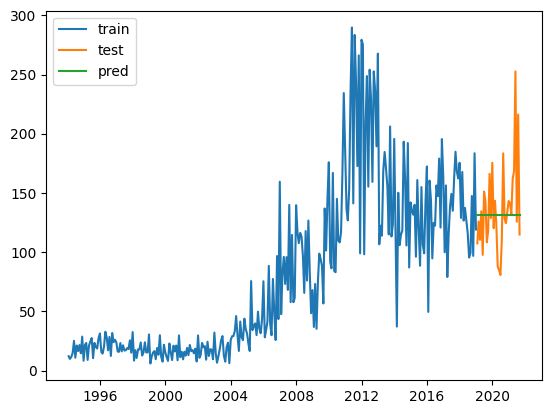

In [50]:
def plot_ys(train, test, pred, labels=["train", "test", "pred"]):
    plt.plot(train, label=labels[0])
    plt.plot(test, label=labels[1])
    plt.plot(pred, label=labels[2])
    plt.legend()
    plt.show()
    
plot_ys(train, test, pred)

#### Suavizado exponencial doble

In [51]:
doble_exp = ExponentialSmoothing(trend='add', seasonal=None)
doble_exp.fit(train)
pred = doble_exp.predict(fh)
pred

p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\utils\datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh

2019-01-31    133.200457
2019-02-28    133.599662
2019-03-31    133.998867
2019-04-30    134.398072
2019-05-31    134.797277
2019-06-30    135.196482
2019-07-31    135.595687
2019-08-31    135.994892
2019-09-30    136.394097
2019-10-31    136.793302
2019-11-30    137.192507
2019-12-31    137.591712
2020-01-31    137.990917
2020-02-29    138.390122
2020-03-31    138.789327
2020-04-30    139.188532
2020-05-31    139.587737
2020-06-30    139.986942
2020-07-31    140.386147
2020-08-31    140.785352
2020-09-30    141.184557
2020-10-31    141.583762
2020-11-30    141.982967
2020-12-31    142.382172
2021-01-31    142.781377
2021-02-28    143.180582
2021-03-31    143.579787
2021-04-30    143.978992
2021-05-31    144.378197
2021-06-30    144.777402
2021-07-31    145.176607
2021-08-31    145.575812
Freq: ME, Name: plomo, dtype: float64

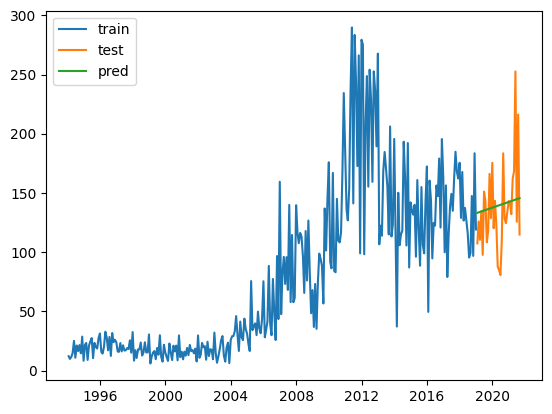

In [52]:
def plot_ys(train, test, pred, labels=["train", "test", "pred"]):
    plt.plot(train, label=labels[0])
    plt.plot(test, label=labels[1])
    plt.plot(pred, label=labels[2])
    plt.legend()
    plt.show()
    
plot_ys(train, test, pred)

#### Suavizado exponencial triple

In [53]:
triple_exp = ExponentialSmoothing(trend='add', seasonal='add')
triple_exp.fit(train)
pred = triple_exp.predict(fh)
pred

p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\utils\datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
p:\maestriaDS\cursos\c2-3-forecasting\env\Lib\site-packages\sktime\forecasting\base\_fh

2019-01-31    105.930017
2019-02-28    110.607379
2019-03-31    121.363466
2019-04-30    124.559953
2019-05-31    130.124562
2019-06-30    124.705496
2019-07-31    135.677270
2019-08-31    125.086861
2019-09-30    138.181992
2019-10-31    132.227195
2019-11-30    130.446801
2019-12-31    156.935890
2020-01-31    110.236343
2020-02-29    114.913706
2020-03-31    125.669792
2020-04-30    128.866280
2020-05-31    134.430889
2020-06-30    129.011823
2020-07-31    139.983596
2020-08-31    129.393187
2020-09-30    142.488319
2020-10-31    136.533521
2020-11-30    134.753128
2020-12-31    161.242217
2021-01-31    114.542670
2021-02-28    119.220032
2021-03-31    129.976119
2021-04-30    133.172607
2021-05-31    138.737215
2021-06-30    133.318150
2021-07-31    144.289923
2021-08-31    133.699514
Freq: ME, Name: plomo, dtype: float64

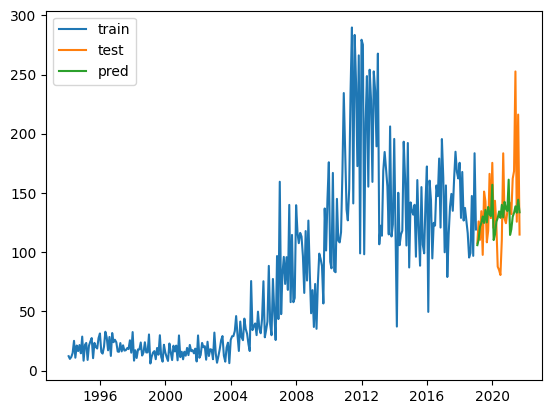

In [54]:
def plot_ys(train, test, pred, labels=["train", "test", "pred"]):
    plt.plot(train, label=labels[0])
    plt.plot(test, label=labels[1])
    plt.plot(pred, label=labels[2])
    plt.legend()
    plt.show()
    
plot_ys(train, test, pred)

De los tres métodos de suavizamiento exponencial, el método de suavizamiento exponencial triple predice mejor que los métodos simple y doble.